# XGBoost Boston House Data

#### Import der Bibliotheken

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import xgboost as xgb
    
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

#### Laden der Daten

In [3]:
boston = load_boston()

#### Analyse der Daten

In [4]:
boston.data.shape

(506, 13)

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
df_houses = pd.DataFrame(boston.data)
df_houses.columns = boston.feature_names

#### Zielvariable

In [7]:
df_houses['PRICE'] = boston.target

In [8]:
df_houses.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


#### XGBoost Datenformat

In [9]:
X = df_houses.iloc[:,:-1]

In [10]:
y = df_houses.iloc[:,-1]

In [11]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

#### Train/Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#### XGBoost Modell 

In [13]:
xg_reg = xgb.XGBRegressor(
    objective ='reg:squarederror',
    colsample_bytree = 0.3,
    learning_rate = 0.1,
    max_depth = 5,
    alpha = 10,
    n_estimators = 10)

#### Training

In [14]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Vorhersage

In [15]:
preds = xg_reg.predict(X_test)

In [16]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.423243


## Kreuzvalidierung

In [17]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [18]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [19]:
print(cv_results.head())
print(cv_results.tail())

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0        21.750758        0.036152       21.765523       0.028849
1        19.778532        0.077649       19.830760       0.031760
2        18.052810        0.118632       18.157336       0.116038
3        16.458958        0.169189       16.623975       0.191413
4        15.074781        0.183545       15.254608       0.213612
    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
45         2.437600        0.121488        4.081600       0.364051
46         2.400291        0.117161        4.054152       0.356458
47         2.358589        0.108396        4.027098       0.375358
48         2.330911        0.103723        4.023613       0.377495
49         2.289405        0.100094        3.996920       0.393780


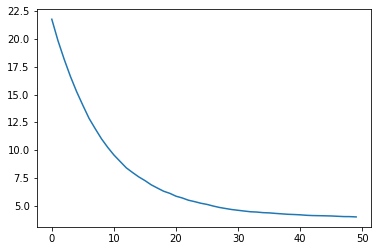

In [20]:
plt.plot(cv_results["test-rmse-mean"])

#### Erstellung des besten Modells

In [21]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

#### Beispielbaum

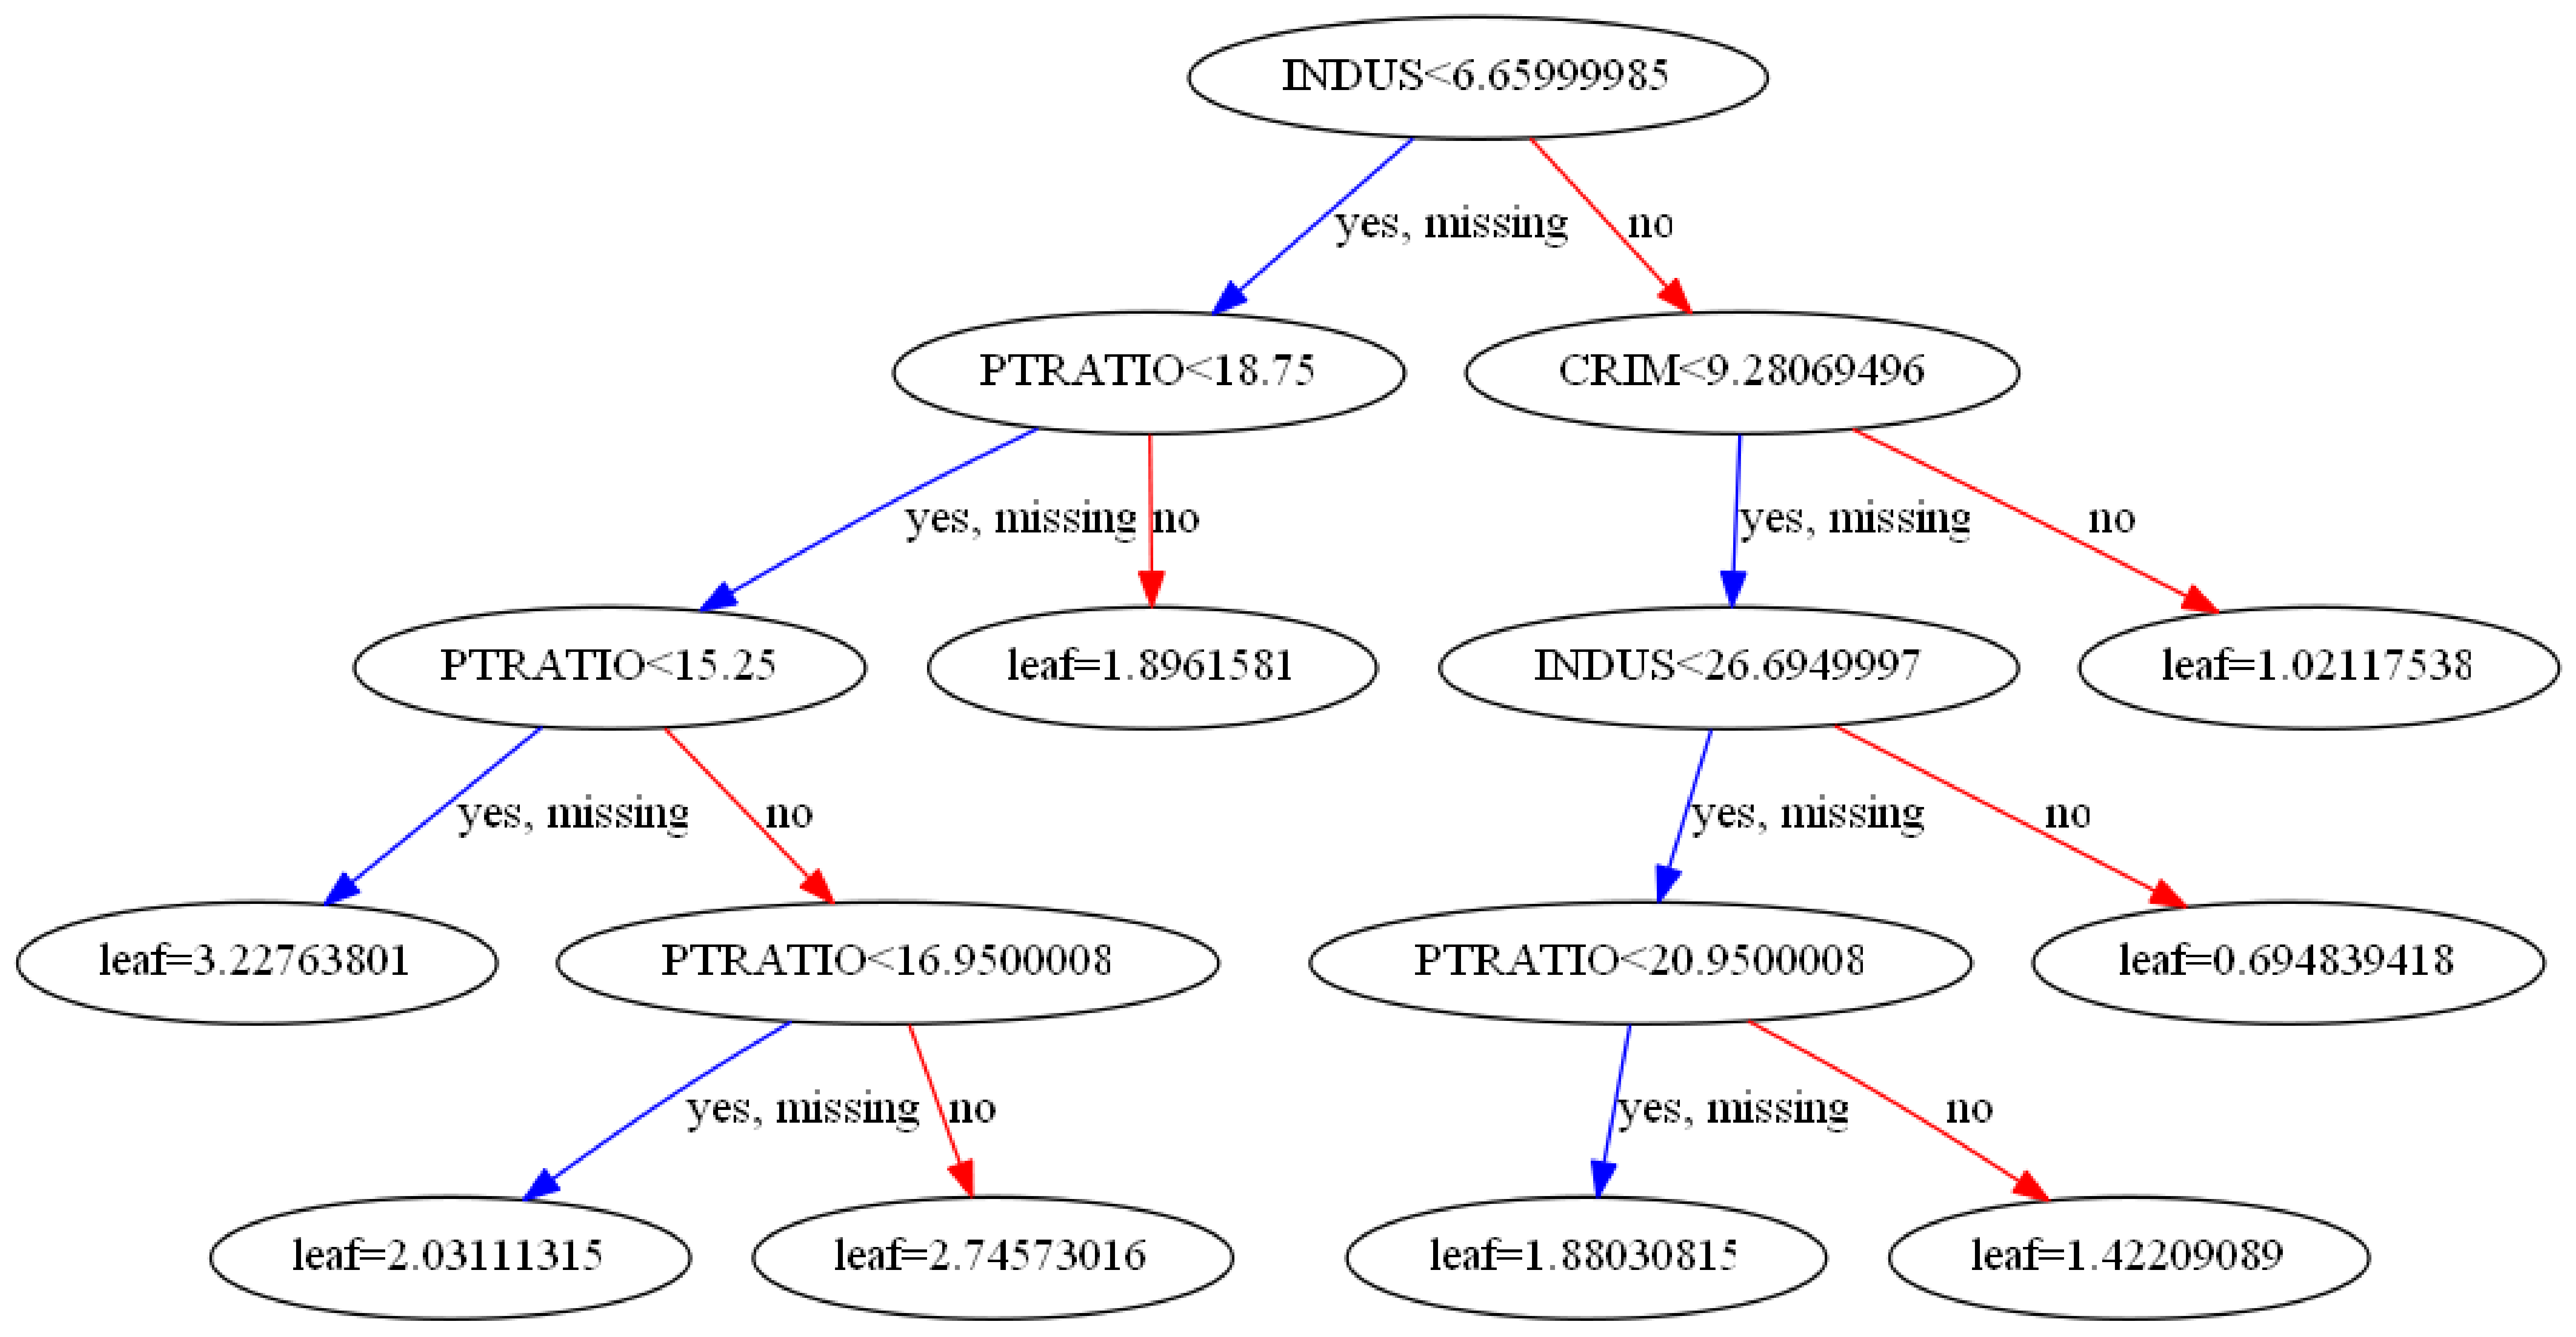

In [25]:
import matplotlib.pyplot as plt
xgb.plot_tree(xg_reg,num_trees=1)
plt.rcParams['figure.figsize'] = [250, 50]
#plt.tight_layout()
plt.savefig('xgb1.pdf')
plt.show()

#### Interpretation Feature Importance

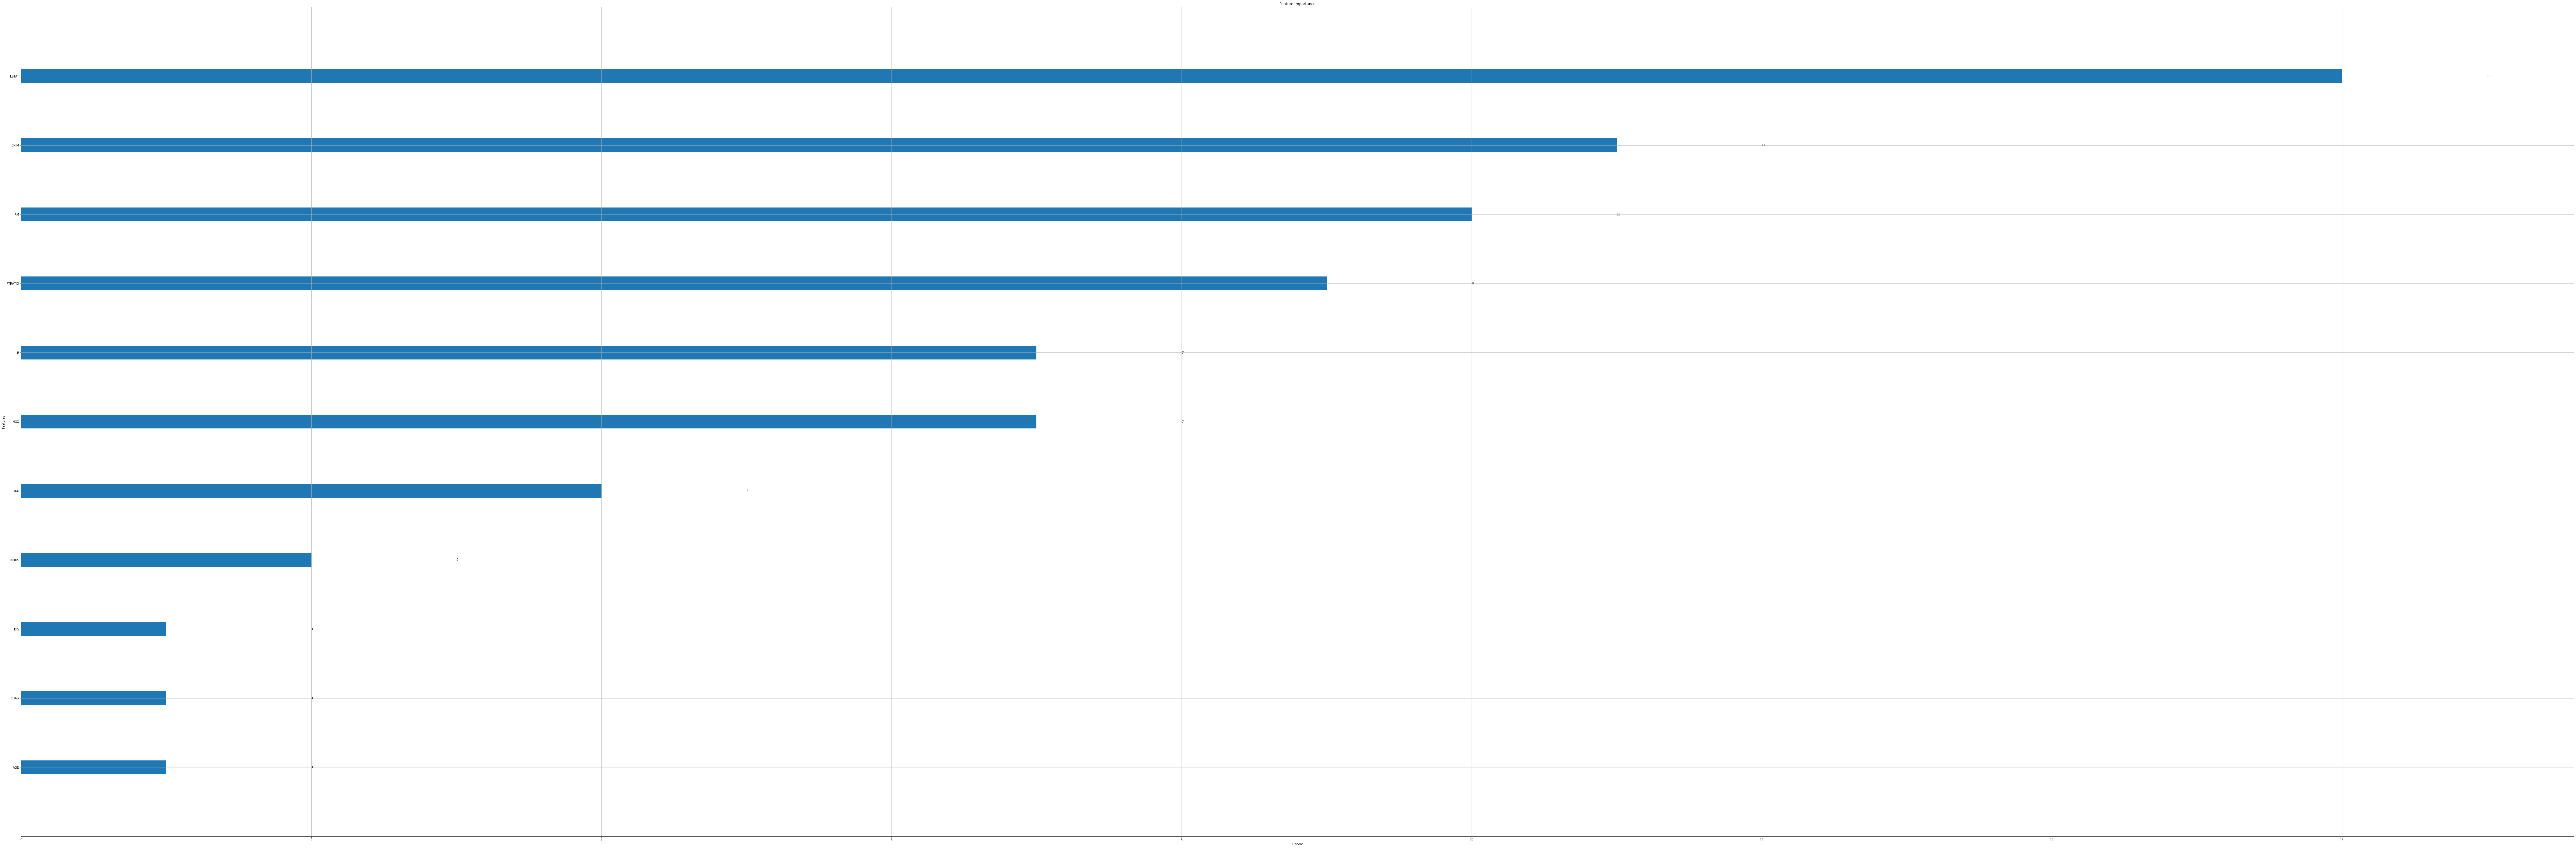

In [23]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()